   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 9.6 MB/s eta 0:00:00
    Eigenvalue (pole)       Damping     Frequency
                 -0.4             1           0.4
    Eigenvalue (pole)       Damping     Frequency
                 -0.8             1           0.8
Steady-state error for open-loop system (step input): 0.5000
Steady-state error for closed-loop system (step input): 0.6667


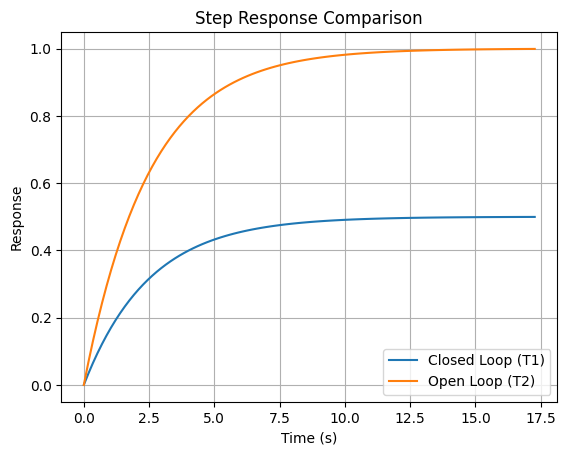

In [1]:
!pip install control
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

s = ctrl.TransferFunction([1, 0], [1])

T1 = 0.4 / (s + 0.8)
T2 = 0.4 / (s + 0.4)

plt.figure()
time, response1 = ctrl.step_response(T1)
time, response2 = ctrl.step_response(T2)
plt.plot(time, response1, label="Closed Loop (T1)")
plt.plot(time, response2, label="Open Loop (T2)")
plt.title("Step Response Comparison")
plt.xlabel("Time (s)")
plt.ylabel("Response")
plt.grid()
plt.legend()

damp_T2 = ctrl.damp(T2)
damp_T1 = ctrl.damp(T1)

Kp_open = ctrl.dcgain(T2)
ess_open = 1 / (1 + Kp_open)

Kp_closed = ctrl.dcgain(T1)
ess_closed = 1 / (1 + Kp_closed)

print(f"Steady-state error for open-loop system (step input): {ess_open:.4f}")
print(f"Steady-state error for closed-loop system (step input): {ess_closed:.4f}")

plt.show()